In [10]:
def taipei_votes_result(district_name):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
   
    district = {'松山區': '63000000100000000', '信義區': '63000000200000000', '大安區': '63000000300000000', '中山區': '63000000400000000', '中正區': '63000000500000000',
           '大同區': '63000000600000000', '萬華區': '63000000700000000', '文山區': '63000000800000000', '南港區': '63000000900000000', '內湖區': '63000001000000000', 
           '士林區': '63000001100000000', '北投區': '63000001200000000'}
    url = str('http://vote.2018.nat.gov.tw/pc/zh_TW/TC/n' + district[district_name] + '.html')
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'}
    re = requests.get(url, headers = headers)
    html = re.text
    dom = BeautifulSoup(html, 'html.parser')
    candidates = dom.find_all('tr', class_ = 'trT')
    
    number = []
    candidate = []
    gender = []
    number_votes = []
    per_votes = []
    political_party = []
    
    for tr in candidates:
        td = tr.find_all('td')
        number.append(td[1].text)
        candidate.append(td[2].text)
        gender.append(td[3].text)
        number_votes.append(int(td[4].text.replace(',', '')))
        per_votes.append(td[5].text)
        political_party.append(td[6].text)
    
    votes_info = {'number': number, 'candidate': candidate, 'gender': gender, 'number_votes': number_votes, 'per_votes': per_votes, 'political_party': political_party}
    votes_result = pd.DataFrame(votes_info)
    
    return votes_result

In [11]:
def get_votes_data():
    import requests
    import pandas as pd
    import time

    district = {'松山區': '63000000100000000', '信義區': '63000000200000000', '大安區': '63000000300000000', '中山區': '63000000400000000', '中正區': '63000000500000000',
           '大同區': '63000000600000000', '萬華區': '63000000700000000', '文山區': '63000000800000000', '南港區': '63000000900000000', '內湖區': '63000001000000000', 
           '士林區': '63000001100000000', '北投區': '63000001200000000'}
    dis_eng = {'松山區':'Songshan',
              '信義區':'Xinyi',
              '大安區':'Daan',
              '中山區':'Zhongshan',
              '中正區':'Zhongzheng',
              '大同區':'Datong',
              '萬華區':'Wanhua',
              '文山區':'Wenshan',
              '南港區':'Nangang',
              '內湖區':'Neihu',
              '士林區':'Shilin',
              '北投區':'Beitou'}
    number = []
    candidate = []
    gender = []
    number_votes = []
    per_votes = []
    political_party = []
    district_name = []
    district_eng = []
    for i in district:
        url = str('http://vote.2018.nat.gov.tw/pc/zh_TW/TC/n' + district[i] + '.html')
        headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'}
        re = requests.get(url, headers = headers)
        html = re.text
        dom = BeautifulSoup(html, 'html.parser')
        candidates = dom.find_all('tr', class_ = 'trT')
        for tr in candidates:
            td = tr.find_all('td')
            number.append(td[1].text)
            candidate.append(td[2].text)
            gender.append(td[3].text)
            number_votes.append(int(td[4].text.replace(',', '')))
            per_votes.append(td[5].text)
            political_party.append(td[6].text)
            district_name.append(i)
            district_eng.append(dis_eng[i])
    time.sleep(2)
    
    votes_info = {'number': number, 'candidate': candidate, 'gender': gender, 'number_votes': number_votes, 'per_votes': per_votes, 'political_party': political_party,
                 'district': district_name, 'district_eng': district_eng}
    votes_data = pd.DataFrame(votes_info)
    
    return votes_data

In [18]:
def taipei_votes_results():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    sns.set_style("whitegrid")
    
    dis = ['松山區','信義區','大安區','中山區','中正區','大同區','萬華區','文山區','南港區','內湖區','士林區','北投區']
    dis_eng = {'松山區':'Songshan District',
              '信義區':'Xinyi District',
              '大安區':'Daan District',
              '中山區':'Zhongshan District',
              '中正區':'Zhongzheng District',
              '大同區':'Datong District',
              '萬華區':'Wanhua District',
              '文山區':'Wenshan District',
              '南港區':'Nangang District',
              '內湖區':'Neihu District',
              '士林區':'Shilin District',
              '北投區':'Beitou District'}
    taipei_pop = pd.read_excel('台北市行政區人口.xlsx')
    age_range = ['區域別', '性別', '20~24歲', '25~29歲', '30~34歲', '35~39歲', '40~44歲', '45~49歲', '50~54歲', '55~59歲', 
             '60~64歲', '65~69歲', '70~74歲', '75~79歲', '80~84歲', '85~89歲']
    
    print('這是一個可以查詢2018臺北市市長選舉結果的程式')
    print('臺北市行政區有:', dis)
    print('請輸入一個行政區名稱:')
    district_name = input()
    dis_eng_name = dis_eng[district_name]
    dis_pop = taipei_pop[taipei_pop.區域別 == district_name][taipei_pop.性別 != '計'][age_range]
    dis_pop = dis_pop.reset_index(drop = True)
    
    new_dis_pop = dis_pop.loc[:, ['區域別', '性別']]
    new_age_range = ['district', 'gender', '20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89']
    
    for j in range(2,15,2):
        new_dis_pop[str(j)] = dis_pop.iloc[:, j] + dis_pop.iloc[:, j+1]
        
    new_dis_pop.columns = new_age_range
    new_dis_pop = new_dis_pop.reset_index(drop = True)
    new_dis_pop1 = pd.melt(new_dis_pop, ['gender', 'district'], var_name = 'age', value_name = 'population')
    dis_income = pd.DataFrame({'district':['Songshan','Xinyi','Daan','Zhongshan',
                                       'Zhongzheng','Datongt','Wanhua','Wenshan',
                                       'Nangang','Neihu','Shilin', 'Beitou'],
                          'income':[823763,738457,823318,702494,792593,659242,693702,698156,616700,682406,679537,715760]})
    dis_income = dis_income.sort_values('income').reset_index(drop = True)
    if district_name in dis:
        votes_data = get_votes_data()
        display(dis_income)
        display(dis_pop)
        votes_result = taipei_votes_result(district_name)
        display(votes_result)
        
        fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2,figsize=(18,10)) #單列用[ax1,ax2,ax3,ax4]多個列要用[[ax1, ax2],[ax3, ax4]]
        fig.subplots_adjust(wspace = 1, hspace = 0.5)
        sns.set_style("whitegrid")
        barplot1 = sns.barplot(x = 'district', y = 'income', data = dis_income, ax = ax1)
        barplot1.set_title('Disposable Income Per Capita')
        barplot1.set_xticklabels(barplot1.get_xticklabels(), rotation = 50)
        
        sns.set_style("whitegrid")
        barplot2 = sns.barplot(x = 'age', y = 'population', hue = 'gender', data = new_dis_pop1, ax = ax2)
        barplot2.set_title("Population of {}".format(dis_eng_name))
        
        sns.set_style("whitegrid")
        barplot4 = sns.pointplot(x = 'district_eng', y = 'number_votes', hue = 'number', data = votes_data, ax = ax3)
        barplot4.set_title('Votes Obtained Over District')
        barplot4.set_xticklabels(barplot4.get_xticklabels(), rotation = 50)
        barplot4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("Candidates's number") 
        barplot4.set(xlabel="district", ylabel='Votes obtained')
        
        sns.set_style("whitegrid")
        barplot3 = sns.barplot(x = 'number', y = 'number_votes', data = votes_result, ax = ax4)
        barplot3.set_title("Candidates' Votes Obtained Of {}".format(dis_eng_name)) 
        barplot3.set(xlabel="Candidates's number", ylabel='Votes obtained')
        #測試簡單的長條圖，中文字體無法順利畫出，所以候選人以號碼代替
        print('=========================說明======================')
        print('此專案所呈現的圖表皆不帶有作者主觀解釋上的意義，同樣的結果對於不同的人皆有不同的詮釋方式，再進行更深入的分析時必須考慮到一些假設，例如因為此次投票為匿名投票，是否各年齡層的投票率皆相同?又例如高年齡人口較多的行政區，如果丁守中以及姚文智的得票率有較高的趨勢相較於其他行政區，能否就代表是敬老金政見的效果?在做相關推論時，我們只能瞭解到統計上的相關性，並不能確保是因果關係，所以在下結論前，是否有更深入的驗證?因此本專案僅提供使用者快速取得及瞭解2018臺北市市長選舉的結果，相關推論皆有待使用者自行詮釋。')
        print('===================================================')
        
    else:
        print('請輸入正確的臺北市行政區名稱')

這是一個可以查詢2018臺北市市長選舉結果的程式
臺北市行政區有: ['松山區', '信義區', '大安區', '中山區', '中正區', '大同區', '萬華區', '文山區', '南港區', '內湖區', '士林區', '北投區']
請輸入一個行政區名稱:
大安區


C:\Users\BEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,district,income
0,Nangang,616700
1,Datongt,659242
2,Shilin,679537
3,Neihu,682406
4,Wanhua,693702
5,Wenshan,698156
6,Zhongshan,702494
7,Beitou,715760
8,Xinyi,738457
9,Zhongzheng,792593


,區域別,性別,20~24歲,25~29歲,30~34歲,35~39歲,40~44歲,45~49歲,50~54歲,55~59歲,60~64歲,65~69歲,70~74歲,75~79歲,80~84歲,85~89歲
0,大安區,male,8095,7388,8212,10783,10381,10357,10312,10120,10121,9550,5934,4314,2882,2301
1,大安區,female,7769,7689,9743,13747,13462,13068,12581,12052,12346,11730,6993,5732,3963,2621


,candidate,gender,number,number_votes,per_votes,political_party
0,吳蕚洋,男,1,585,0.37%,無
1,丁守中,男,2,72325,45.73%,中國國民黨
2,姚文智,男,3,23651,14.95%,民主進步黨
3,柯文哲,男,4,60939,38.53%,無
4,李錫錕,男,5,662,0.42%,無


=========================說明======================
此專案所呈現的圖表皆不帶有作者主觀解釋上的意義，同樣的結果對於不同的人皆有不同的詮釋方式，再進行更深入的分析時必須考慮到一些假設，例如因為此次投票為匿名投票，是否各年齡層的投票率皆相同?又例如高年齡人口較多的行政區，如果丁守中以及姚文智的得票率有較高的趨勢相較於其他行政區，能否就代表是敬老金政見的效果?在做相關推論時，我們只能瞭解到統計上的相關性，並不能確保是因果關係，所以在下結論前，是否有更深入的驗證?因此本專案僅提供使用者快速取得及瞭解2018臺北市市長選舉的結果，相關推論皆有待使用者自行詮釋。


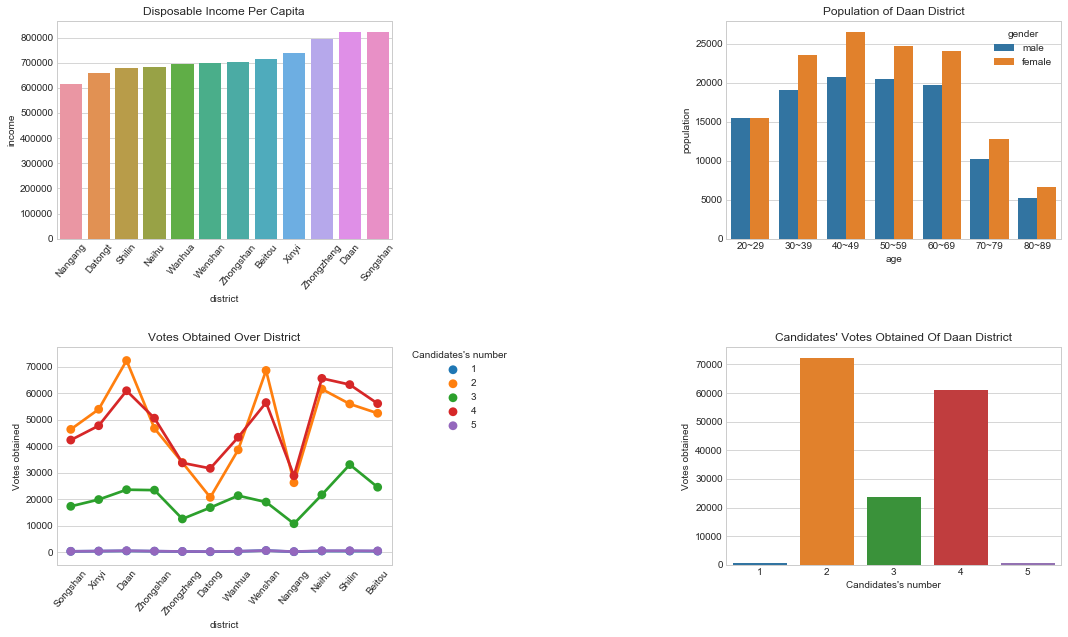

In [19]:
taipei_votes_results()